Name:- Om Dipak Patil

Course:- MSc Data Science, AI and Digital Business

Module:- M508C Big Data Analytics


**AI-Powered Fake News Detector – Highlights the technology powering it.**

**Introduction:**

The rapid proliferation of digital media and social platforms has dramatically increased the spread of information, making it increasingly difficult to discern factual news from false or misleading content. Fake news not only misguides the public but also poses serious threats to social, political, and economic stability. Traditional methods of news verification are often manual, time-consuming, and insufficient to handle the massive volume of daily news articles. Therefore, there is a critical need for intelligent systems that can automatically and accurately identify fake news using advanced computational techniques.

This project leverages state-of-the-art Natural Language Processing (NLP) and machine learning methodologies to develop a robust fake news detection system. By combining techniques such as TF-IDF, word embeddings (Word2Vec/GloVe), recurrent neural networks (LSTM), and transformer-based models (BERT), the system analyzes textual patterns, semantic context, and linguistic cues to distinguish between real and fake news articles. Comprehensive exploratory data analysis (EDA), advanced preprocessing, and rigorous model evaluation ensure both accuracy and reliability, making this solution highly effective for practical deployment in news verification platforms.

**Business Problem:**

In today’s digital era, the rapid spread of fake news misleads audiences, damages reputations, and can influence critical decisions in politics, finance, and public health. Organizations and platforms struggle to manually verify the authenticity of content due to the sheer volume of information. There is an urgent need for an automated, intelligent solution that can reliably detect and flag fake news, ensuring that users and decision-makers access accurate and trustworthy information.

**Problem Statement:**

The widespread dissemination of fake news on digital platforms poses a significant threat to societal trust, public safety, and informed decision-making. Existing manual verification methods are inefficient and unable to keep pace with the volume and velocity of online content. The challenge is to develop an automated, accurate, and scalable system that can analyze textual content, detect misleading or false information, and differentiate it from legitimate news in real-time, leveraging advanced Natural Language Processing (NLP) and machine learning techniques.

**Dataset:**

The dataset used for this project contains labeled news articles categorized as Fake or Real, providing a rich source of textual data for building and evaluating fake news detection models. Each entry in the dataset includes the full news content along with its corresponding label, enabling supervised learning approaches. The dataset captures a wide variety of topics, writing styles, and sources, making it suitable for training models that can generalize well across diverse news articles.

Dataset Link: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

**Objectives:**
1. Develop an automated fake news detection system capable of accurately classifying news articles as real or fake using advanced NLP and machine learning techniques.
2. Perform comprehensive text analysis and feature engineering to capture linguistic patterns, semantic context, and writing style differences between fake and real news.
3. Leverage state-of-the-art models such as TF-IDF with Logistic Regression, LSTM networks, and Transformer-based models (BERT & DistilBERT) to maximize classification performance.
4. Conduct strong evaluation and validation using multiple metrics, including accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices, to ensure reliability and fairness.

**PHASE 1 — DATA ACQUISITION**

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 142.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install nltk

This project leverages a combination of Python libraries to build a robust fake news detection system. NumPy and Pandas are used for efficient data manipulation, while Matplotlib and Seaborn enable clear visualizations of distributions and patterns. Text preprocessing and NLP tasks such as tokenization, lemmatization, stopword removal, POS tagging, and Named Entity Recognition are handled using NLTK and spaCy, with langdetect, TextBlob, and textstat providing language detection, sentiment analysis, and readability scores. Feature engineering is performed using TF-IDF, n-grams, and Word2Vec embeddings. For modeling, traditional ML models like Logistic Regression and SVM, deep learning LSTM networks, and transformer-based models like BERT and DistilBERT are employed. Levenshtein is used for edit distance calculation, while scikit-learn metrics and WordCloud assist in model evaluation and visualization. Warnings are suppressed for cleaner outputs.

In [167]:
# BASIC LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TEXT PROCESSING
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
# POS & NER (spaCy)
import spacy
# LANGUAGE DETECTION
!pip install langdetect
from langdetect import detect
# SENTIMENT ANALYSIS
from textblob import TextBlob
# READABILITY SCORES
!pip install textstat
import textstat
# FEATURE ENGINEERING: TF-IDF & N-GRAMS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# WORD2VEC (FOR LSTM)
!pip install gensim
from gensim.models import Word2Vec, KeyedVectors
# TRAIN / TEST SPLIT & IMPBALANCED HANDLING
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
# SMOTE for imbalance
from imblearn.over_sampling import SMOTE
# MACHINE LEARNING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# LSTM (DEEP LEARNING)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# TRANSFORMER MODELS (BERT, DISTILBERT)
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import AdamWeightDecay
# LEVENSHTEIN DISTANCE (Edit distance V1 & V2)
!pip install python-Levenshtein
import Levenshtein
# MODEL EVALUATION
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support
)
# VISUALIZATION (WORD CLOUD)
from wordcloud import WordCloud
# WARNINGS
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully!")

All libraries imported successfully!


**Load your Datset**

The dataset consists of 72,134 news articles, each labeled as fake (1) or real (0). It contains four columns: Unnamed: 0 (index), title (headline of the news), text (full content of the article), and label (target class). The dataset includes a diverse range of topics, including politics, world events, and social issues, capturing varying writing styles and sources. Some entries may have missing titles, requiring preprocessing. This dataset serves as the foundation for training and evaluating fake news detection models using NLP and machine learning techniques.

In [4]:
# Load dataset (CSV file)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake_News_NLP/WELFake_Dataset.csv")
print(df)
# Show first 5 rows
df.head()


       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                NaN   
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Barack Obama Membe...      1  
1  

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [6]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [7]:
print("Dataset Shape:", df.shape)
print("Available columns:")
print(list(df.columns))


Dataset Shape: (72134, 4)
Available columns:
['Unnamed: 0', 'title', 'text', 'label']


**PHASE 2 — TEXT CLEANING**



Check for Duplicates

In [8]:
duplicates_count = df.duplicated().sum()
print("Total Duplicate Rows:", duplicates_count)


Total Duplicate Rows: 0


Display Class Distribution

In [9]:
df['label'].value_counts()
(df['label'].value_counts(normalize=True) * 100).round(2)

,proportion
label,
1,51.44
0,48.56


**Class Distribution Analysis:**

The count plot of the label column shows the distribution of fake (1) and real (0) news articles in the dataset. Both classes are almost evenly represented, with fake news slightly higher than real news. This indicates that the dataset is relatively balanced, which is favorable for training classification models, as it reduces bias toward one class and ensures fair evaluation of model performance.

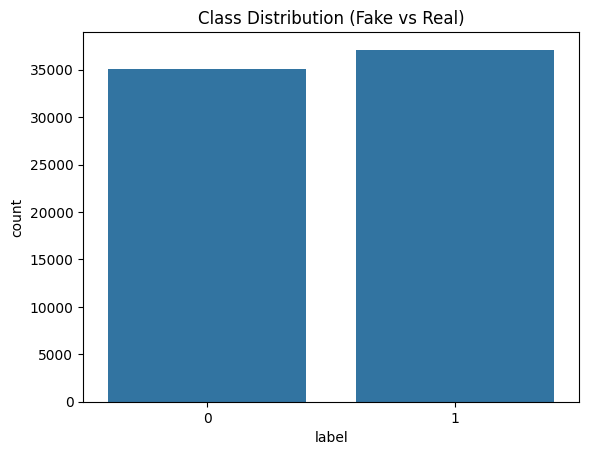

In [10]:
sns.countplot(data=df, x='label')
plt.title("Class Distribution (Fake vs Real)")
plt.show()


In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Text Cleaning Function: `basic_clean`

The `basic_clean` function is designed to preprocess news text for NLP tasks by removing unwanted noise and standardizing the content. It performs the following steps:

- **Remove HTML Tags:** Cleans any HTML elements present in the text using BeautifulSoup.

- **Remove URLs:** Eliminates web links (`http`, `https`, `www`) to avoid irrelevant tokens.

- **Remove Emojis:** Strips out emojis and emoticons to maintain textual consistency.

- **Remove Special Characters:** Keeps only letters, numbers, and basic punctuation (`.,!?`), removing other symbols that do not contribute to textual meaning.

- **Remove Extra Spaces:** Cleans up multiple spaces, ensuring a tidy and uniform text format.

This preprocessing step is critical for improving **model performance**, as it ensures that the input text is clean, consistent, and suitable for feature extraction and model training in fake news detection.


In [12]:
from bs4 import BeautifulSoup

def basic_clean(text):
    if not isinstance(text, str):
        return ""

    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3. Remove Emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # 4. Remove special characters (keep letters, numbers, punctuation)
    text = re.sub(r"[^a-zA-Z0-9\s.,!?]", " ", text)

    # 5. Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

**Tokenization Function:**

The tokenize_text function splits input text into individual words (tokens) using NLTK’s word_tokenize, which is essential for further NLP processing like feature extraction, embeddings, and analysis.

In [13]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


In [14]:
stop_words = set(stopwords.words("english"))
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]


In [15]:
def preprocess_text(text):
    cleaned = basic_clean(text)
    tokens = tokenize_text(cleaned)
    tokens = remove_stopwords(tokens)
    return tokens


# Text Preprocessing: Cleaning, Tokenization, and Stopword Removal

In this step, the raw news text is processed to prepare it for NLP modeling:

1. **Cleaning (`basic_clean`)**: Removes HTML tags, URLs, emojis, special characters, and extra spaces from the text. The cleaned text is stored in the `cleaned_text` column.

2. **Tokenization (`tokenize_text`)**: Splits the cleaned text into individual words (tokens) using NLTK’s `word_tokenize`. The resulting tokens are stored in the `tokens` column.

3. **Stopword Removal (`remove_stopwords`)**: Removes common stopwords from the tokenized text to focus on meaningful words. The final tokens without stopwords are stored in `tokens_no_stopwords`.

The resulting DataFrame now includes three additional columns: `cleaned_text`, `tokens`, and `tokens_no_stopwords`, which are essential for feature extraction and model training.

In [16]:
df["cleaned_text"] = df["text"].apply(basic_clean)
df["tokens"] = df["cleaned_text"].apply(tokenize_text)
df["tokens_no_stopwords"] = df["tokens"].apply(remove_stopwords)

df.head()

,Unnamed: 0,title,text,label,cleaned_text,tokens,tokens_no_stopwords
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...,"[No, comment, is, expected, from, Barack, Obam...","[comment, expected, Barack, Obama, Members, FY..."
1,1,NaN,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,"[Did, they, post, their, votes, for, Hillary, ...","[post, votes, Hillary, already, ?]"
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"Now, most of the demonstrators gathered last n...","[Now, ,, most, of, the, demonstrators, gathere...","[,, demonstrators, gathered, last, night, exer..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...,"[A, dozen, politically, active, pastors, came,...","[dozen, politically, active, pastors, came, pr..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"The RS 28 Sarmat missile, dubbed Satan 2, will...","[The, RS, 28, Sarmat, missile, ,, dubbed, Sata...","[RS, 28, Sarmat, missile, ,, dubbed, Satan, 2,..."


**PHASE 3 — EXPLORATORY DATA ANALYSIS (EDA)**

# EDA Feature Extraction using spaCy: `extract_features_spacy`

The `extract_features_spacy` function is designed to extract **text-level numerical features** from news articles using spaCy’s NLP capabilities. These features provide insights into writing patterns and content complexity, which are important for fake news detection. The function calculates the following for each article:

1. **Word Count (`word_count`)**: Total number of words in the text.  
2. **Character Count (`char_count`)**: Total number of characters in the text.  
3. **Sentence Count (`sentence_count`)**: Number of sentences in the text, determined using spaCy’s sentence segmentation.  
4. **Average Word Length (`avg_word_length`)**: Mean length of words in the text, giving an indication of vocabulary complexity.

**Analysis of the Sample Output:**

- Some rows may have empty or missing text, resulting in zero values for all features (e.g., row 61370).  
- Word count and character count vary significantly, reflecting differences in article length.  
- Sentence count is typically low (mostly 1 in this sample), suggesting that many articles may consist of single long sentences or paragraphs.  
- Average word length ranges from ~3.7 to ~4.4, indicating variations in vocabulary complexity between articles.  




In [20]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

In [21]:
def extract_features_spacy(text):
    if not isinstance(text, str):
        return pd.Series([0, 0, 0, 0])

    doc = nlp(text)

    words = [token.text for token in doc]
    word_count = len(words)
    char_count = len(text)

    # sentence count using spaCy's sentencizer (auto)
    try:
        sentence_count = len(list(doc.sents))
    except:
        sentence_count = 1

    # average word length
    if word_count > 0:
        avg_word_length = np.mean([len(w) for w in words])
    else:
        avg_word_length = 0

    return pd.Series([word_count, char_count, sentence_count, avg_word_length])


In [23]:
df_sample = df.sample(n=5000, random_state=42)


In [24]:
df_sample[['word_count','char_count','sentence_count','avg_word_length']] = \
    df_sample['cleaned_text'].apply(extract_features_spacy)


In [25]:
df_sample[['cleaned_text',
           'word_count',
           'char_count',
           'sentence_count',
           'avg_word_length']].head()


,cleaned_text,word_count,char_count,sentence_count,avg_word_length
61370,,0.0,0.0,0.0,0.000000
2189,And now a message of peace and unity from one ...,173.0,800.0,1.0,3.716763
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...",487.0,2599.0,1.0,4.433265
51565,"The two Franciscan friars, complete with robes...",1057.0,5157.0,1.0,4.000946
39431,Approximately 1 in 68 children has an autism s...,38.0,197.0,1.0,4.289474


The histogram shows the distribution of word counts across news articles. It provides insight into article length, helping identify patterns and differences between short and long texts, which can be useful for distinguishing fake and real news.

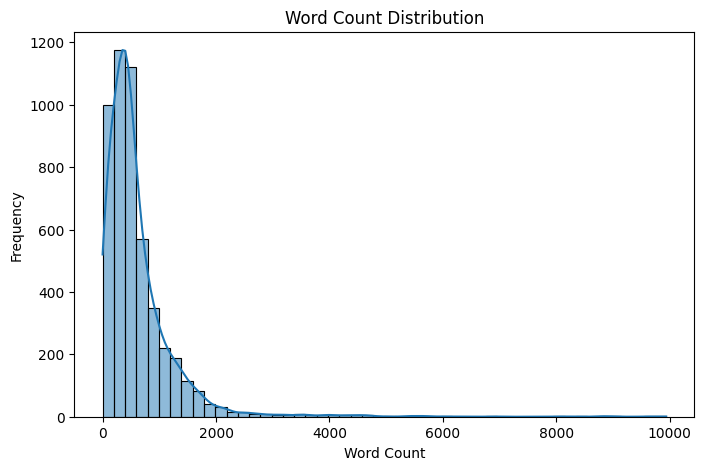

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df_sample['word_count'], bins=50, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


This histogram displays the distribution of character counts in news articles. It helps understand text length variations and provides insights into the complexity and verbosity of articles, which can aid in distinguishing fake from real news.

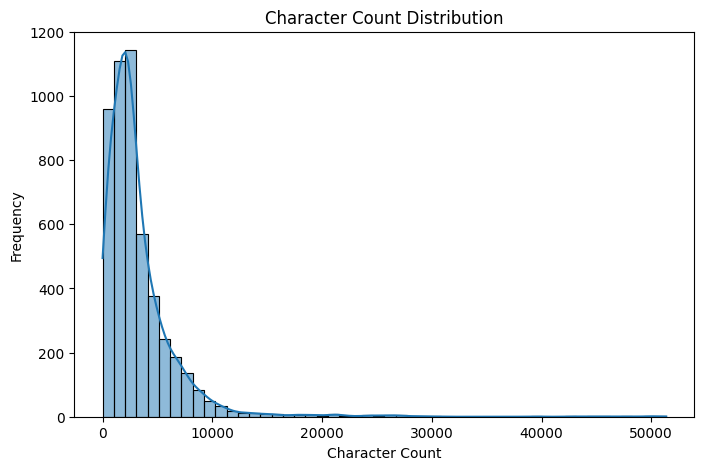

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df_sample['char_count'], bins=50, kde=True)
plt.title("Character Count Distribution")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()


The histogram illustrates the distribution of average word lengths across articles. It provides insights into vocabulary complexity, helping to identify differences in writing style between fake and real news.

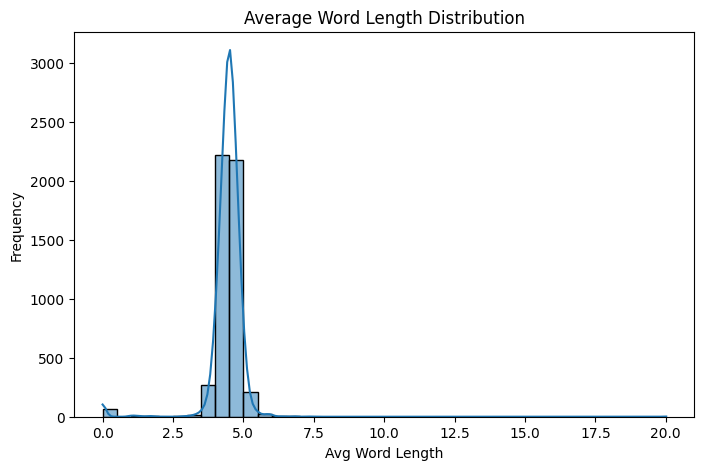

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df_sample['avg_word_length'], bins=40, kde=True)
plt.title("Average Word Length Distribution")
plt.xlabel("Avg Word Length")
plt.ylabel("Frequency")
plt.show()



**Boxplot of Text Features:**

The boxplot visualizes the distribution of key text features—word count, character count, and average word length—highlighting medians, quartiles, and potential outliers. This helps identify variations in article length and complexity, which can be useful for distinguishing fake and real news.

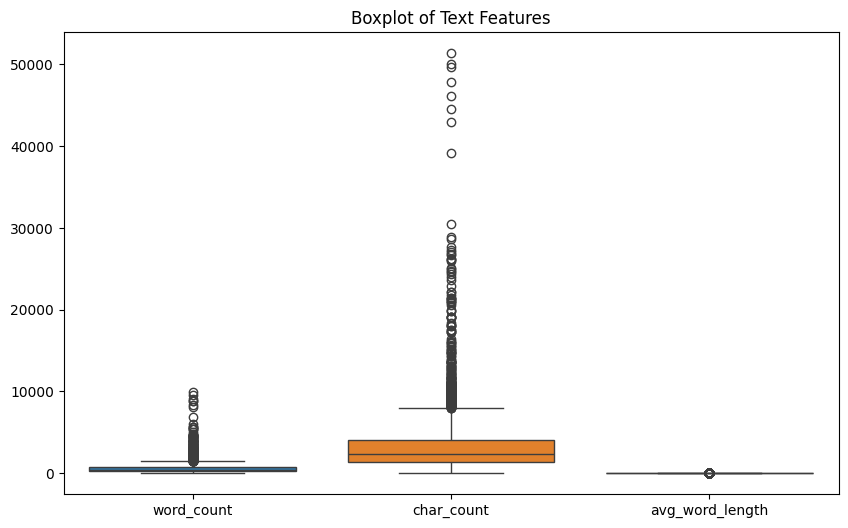

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_sample[['word_count','char_count','avg_word_length']])
plt.title("Boxplot of Text Features")
plt.show()


# Fake News Detection — Text Feature Dashboard

This dashboard provides a comparative analysis of key textual features between **Real News** and **Fake News** articles. Each subplot visualizes the distribution of a specific feature, highlighting differences in writing patterns and content structure:

1. **Word Count Distribution:** Shows how the number of words varies across articles. Fake news may tend to have shorter or simpler articles compared to real news.  
2. **Character Count Distribution:** Illustrates variations in total character length of articles, reflecting article verbosity.  
3. **Sentence Count Distribution:** Highlights differences in sentence structure and paragraphing, which can reveal simpler or more fragmented writing in fake news.  
4. **Average Word Length Distribution:** Demonstrates the complexity of vocabulary, with fake news often using shorter, simpler words compared to real news.

This dashboard helps identify textual patterns that can assist in differentiating fake and real news, supporting feature engineering and model development.


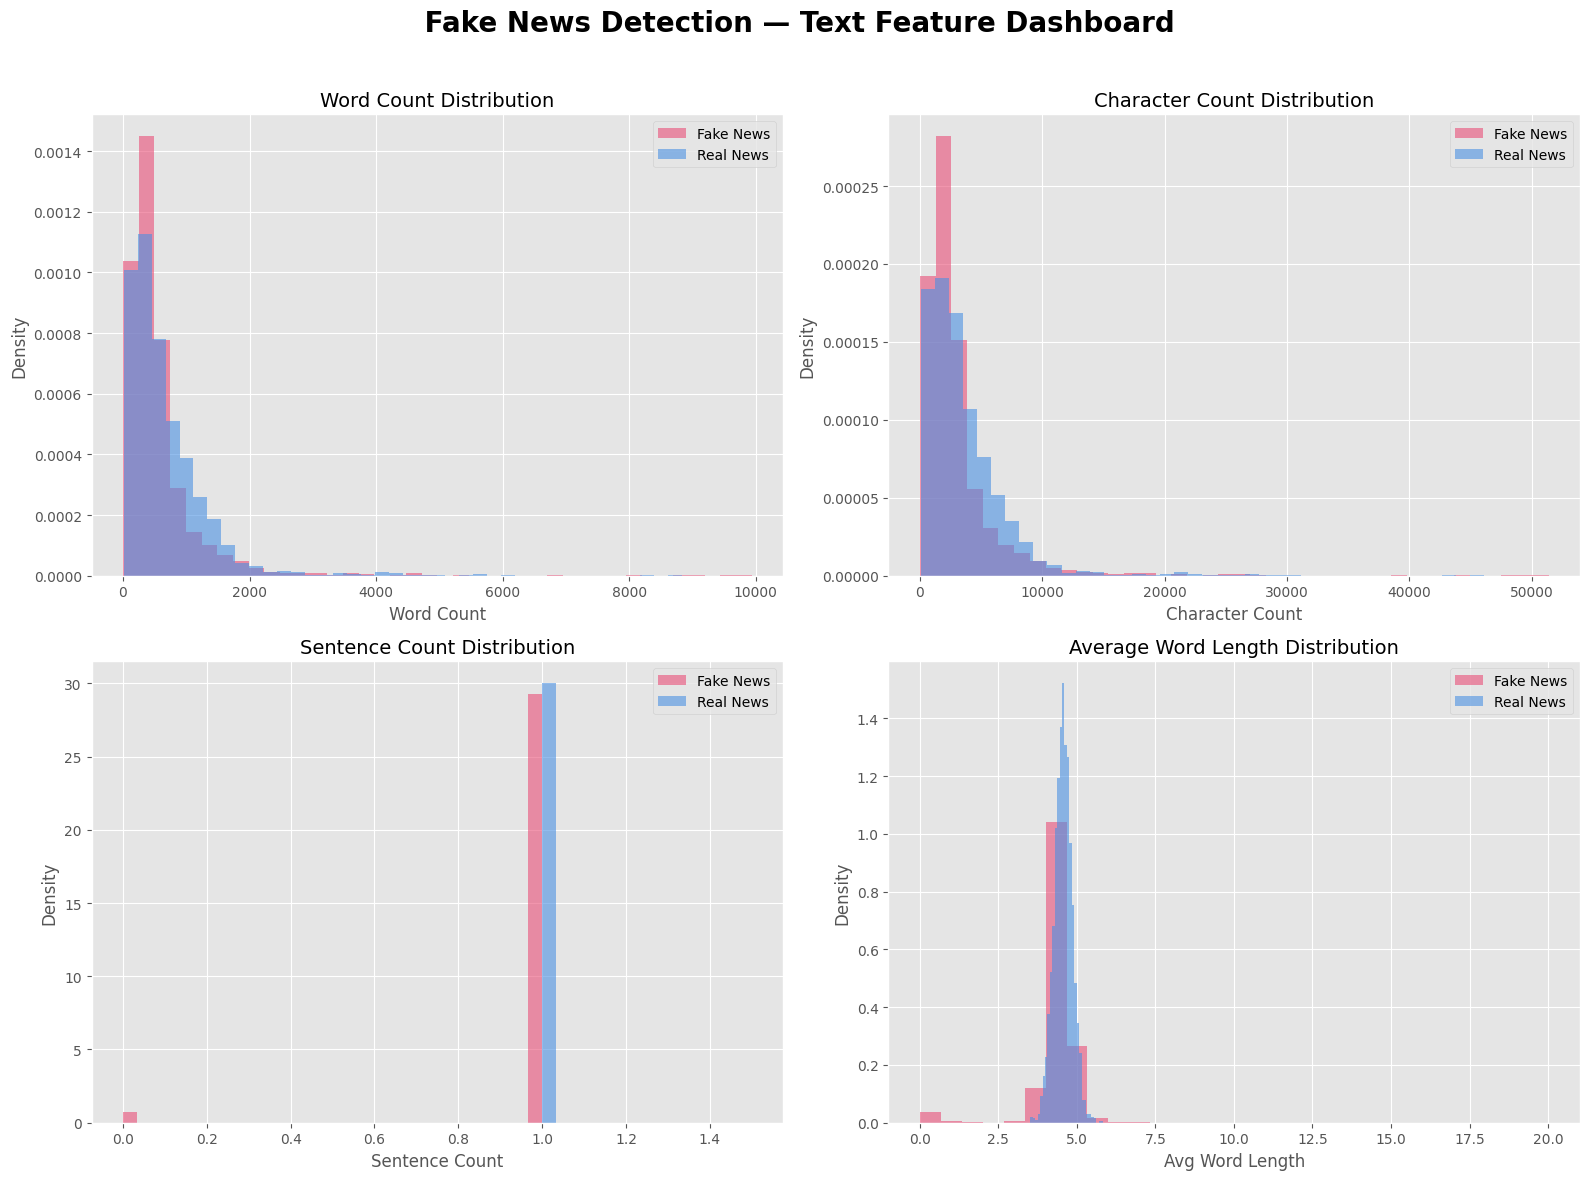

In [36]:

colors = {0: "#4A90E2", 1: "#E94E77"}     # Blue = Real, Pink = Fake
labels = {0: "Real News", 1: "Fake News"}
plt.style.use('ggplot')  # clean dashboard aesthetic

# Create Dashboard Figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(" Fake News Detection — Text Feature Dashboard", fontsize=20, fontweight='bold')

# Word Count Distribution

ax = axes[0, 0]
for lbl in df_sample['label'].unique():
    subset = df_sample[df_sample['label'] == lbl]['word_count']
    ax.hist(subset, bins=40, alpha=0.6, color=colors[lbl], label=labels[lbl], density=True)

ax.set_title("Word Count Distribution", fontsize=14)
ax.set_xlabel("Word Count")
ax.set_ylabel("Density")
ax.legend()

#  Character Count Distribution
ax = axes[0, 1]
for lbl in df_sample['label'].unique():
    subset = df_sample[df_sample['label'] == lbl]['char_count']
    ax.hist(subset, bins=40, alpha=0.6, color=colors[lbl], label=labels[lbl], density=True)

ax.set_title("Character Count Distribution", fontsize=14)
ax.set_xlabel("Character Count")
ax.set_ylabel("Density")
ax.legend()
# Sentence Count Distribution
ax = axes[1, 0]
for lbl in df_sample['label'].unique():
    subset = df_sample[df_sample['label'] == lbl]['sentence_count']
    ax.hist(subset, bins=30, alpha=0.6, color=colors[lbl], label=labels[lbl], density=True)

ax.set_title("Sentence Count Distribution", fontsize=14)
ax.set_xlabel("Sentence Count")
ax.set_ylabel("Density")
ax.legend()

#  Average Word Length
ax = axes[1, 1]
for lbl in df_sample['label'].unique():
    subset = df_sample[df_sample['label'] == lbl]['avg_word_length']
    ax.hist(subset, bins=30, alpha=0.6, color=colors[lbl], label=labels[lbl], density=True)

ax.set_title("Average Word Length Distribution", fontsize=14)
ax.set_xlabel("Avg Word Length")
ax.set_ylabel("Density")
ax.legend()

# Layout formatting
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



**WordCloud Visualization — Fake vs Real News**

This visualization displays the most frequent words in **Fake News** and **Real News** articles using WordClouds:

- **Fake News WordCloud:** Highlights common words and phrases often used in fake news articles, which may include sensational, emotional, or clickbait terms.  
- **Real News WordCloud:** Shows frequently occurring words in genuine news articles, typically reflecting formal reporting, verified facts, and neutral language.  

By comparing these word clouds, we can visually observe differences in vocabulary and writing style between fake and real news, aiding in feature engineering and model interpretation.


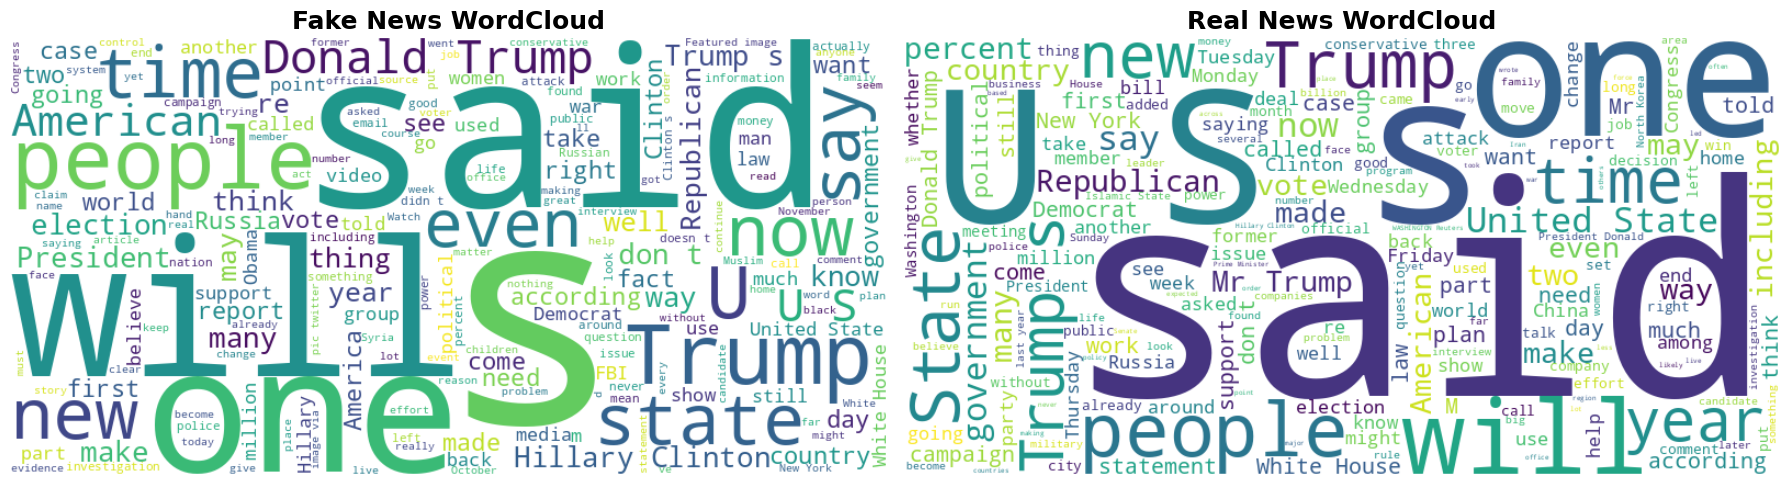

In [38]:
!pip install wordcloud
from wordcloud import WordCloud
# Generate combined text for each class
fake_text = " ".join(df_sample[df_sample['label'] == 1]['cleaned_text'])
real_text = " ".join(df_sample[df_sample['label'] == 0]['cleaned_text'])
# Create word clouds
wc_fake = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(fake_text)
wc_real = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(real_text)
# Dashboard-style layout
plt.figure(figsize=(18, 8))
# Fake News WordCloud (Left)
plt.subplot(1, 2, 1)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title("Fake News WordCloud", fontsize=18, fontweight='bold')
plt.axis('off')
# Real News WordCloud (Right)
plt.subplot(1, 2, 2)
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Real News WordCloud", fontsize=18, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


**Treemap of Top Fake News Keywords**

This treemap visualizes the **top 20 most frequent keywords** in fake news articles:

- Each rectangle represents a keyword, and its size corresponds to its frequency in the dataset.  
- The treemap provides a clear overview of the dominant words used in fake news, often highlighting **sensational, emotional, or attention-grabbing terms**.  
- This visualization helps identify **common patterns and themes** in fake news writing, which can be valuable for feature engineering and model development.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


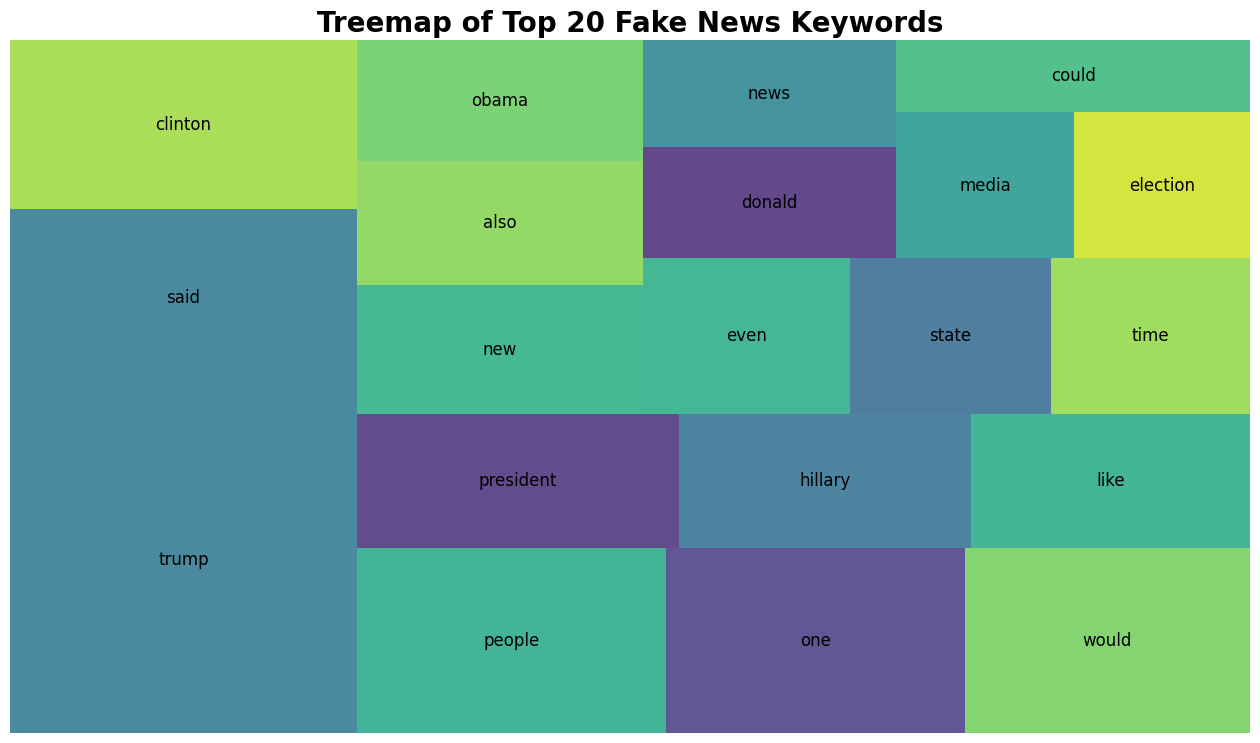

In [41]:
!pip install squarify
import squarify
from collections import Counter
from nltk.corpus import stopwords
# Ensure stopwords downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Function to get clean tokens
def get_tokens(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens
# Extract fake news text only
fake_texts = df_sample[df_sample['label'] == 1]['cleaned_text'].astype(str)
# Flatten tokens
all_fake_tokens = []
for txt in fake_texts:
    all_fake_tokens.extend(get_tokens(txt))
# Count frequencies
fake_word_freq = Counter(all_fake_tokens).most_common(20)
# Prepare data for treemap
words = [w for w, c in fake_word_freq]
counts = [c for w, c in fake_word_freq]
# Treemap visualization
plt.figure(figsize=(16, 9))
squarify.plot(sizes=counts, label=words, alpha=0.85, text_kwargs={'fontsize': 12})
plt.title("Treemap of Top 20 Fake News Keywords", fontsize=20, fontweight='bold')
plt.axis('off')
plt.show()


**POS Tag Distribution — Fake vs Real News**

This bar chart compares the **Part-of-Speech (POS) tag frequencies** between fake and real news articles:

- **X-axis:** POS tags (e.g., nouns, verbs, adjectives)  
- **Y-axis:** Frequency of each POS tag in the respective class  
- **Fake News vs Real News:** Highlights differences in writing style and sentence structure  

**Insights:**  
- Fake news often uses simpler sentence structures with higher frequencies of certain POS tags (like adjectives or proper nouns) to evoke emotion or attention.  
- Real news tends to have a more balanced distribution across POS tags, reflecting formal and structured reporting.  

This analysis helps in understanding syntactic patterns that can be leveraged for feature engineering in fake news detection.




In [42]:
import spacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter

def get_pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]


In [43]:
fake_sample = df_sample[df_sample['label'] == 1].head(1000)
real_sample = df_sample[df_sample['label'] == 0].head(1000)

fake_pos = []
real_pos = []

for t in fake_sample['cleaned_text']:
    fake_pos.extend(get_pos_tags(t))

for t in real_sample['cleaned_text']:
    real_pos.extend(get_pos_tags(t))


In [44]:
fake_pos_count = Counter(fake_pos)
real_pos_count = Counter(real_pos)


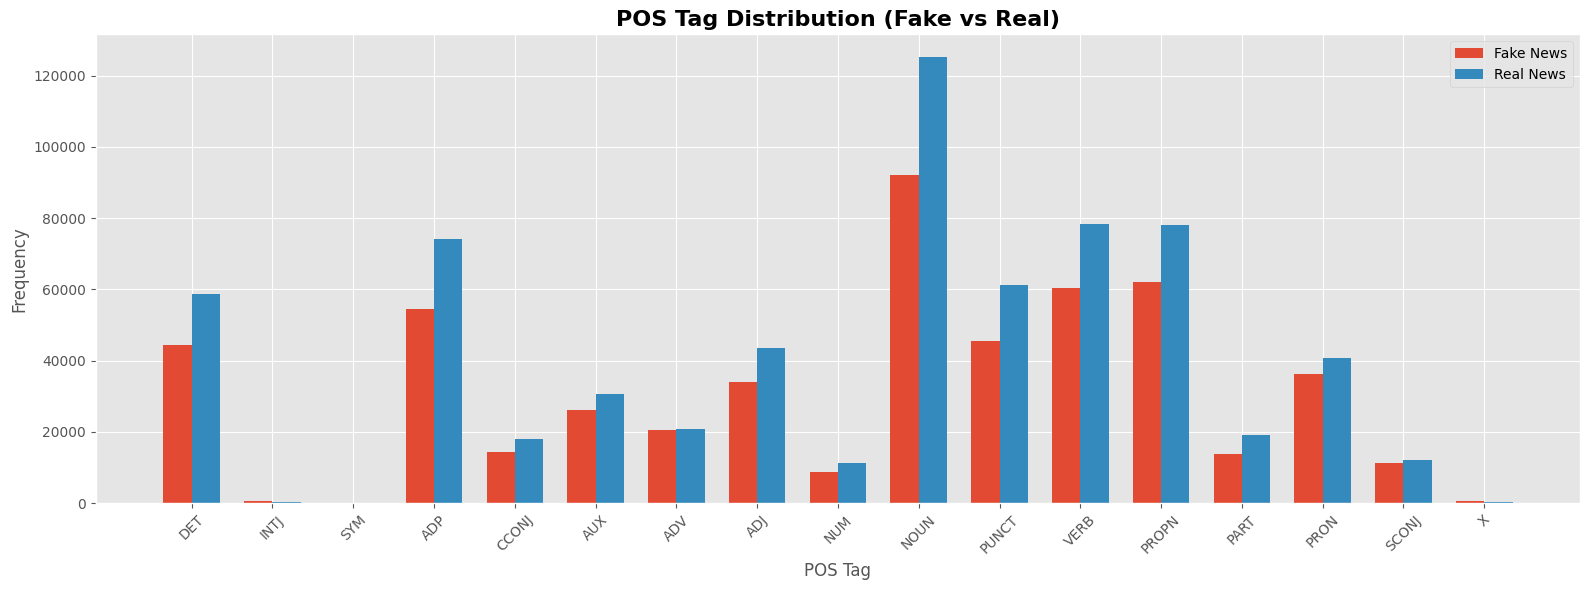

In [45]:
labels = list(set(list(fake_pos_count.keys()) + list(real_pos_count.keys())))
fake_vals = [fake_pos_count.get(l, 0) for l in labels]
real_vals = [real_pos_count.get(l, 0) for l in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(16,6))
plt.bar(x - width/2, fake_vals, width, label='Fake News')
plt.bar(x + width/2, real_vals, width, label='Real News')

plt.xticks(x, labels, rotation=45)
plt.title("POS Tag Distribution (Fake vs Real)", fontsize=16, fontweight='bold')
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


**Named Entity Distribution — Fake vs Real News**

This bar chart compares the frequency of **named entity types** in fake and real news articles:

- **X-axis:** Entity types (e.g., PERSON, ORG, GPE)  
- **Y-axis:** Frequency of each entity type in the respective class  
- **Fake News vs Real News:** Highlights differences in entity usage and focus  

**Insights:**  
- Fake news often mentions **politicians, celebrities, or emotionally charged entities** more frequently to attract attention or manipulate sentiment.  
- Real news tends to reference **verified organizations, official locations, and formal entities**, reflecting factual reporting.  

Analyzing NER distributions helps identify patterns in entity usage, which can be leveraged as features in fake news detection models.


In [46]:
def get_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]


In [47]:
fake_entities = []
real_entities = []

for t in fake_sample['cleaned_text']:
    fake_entities.extend(get_entities(t))

for t in real_sample['cleaned_text']:
    real_entities.extend(get_entities(t))


In [48]:
fake_ner_count = Counter(fake_entities)
real_ner_count = Counter(real_entities)


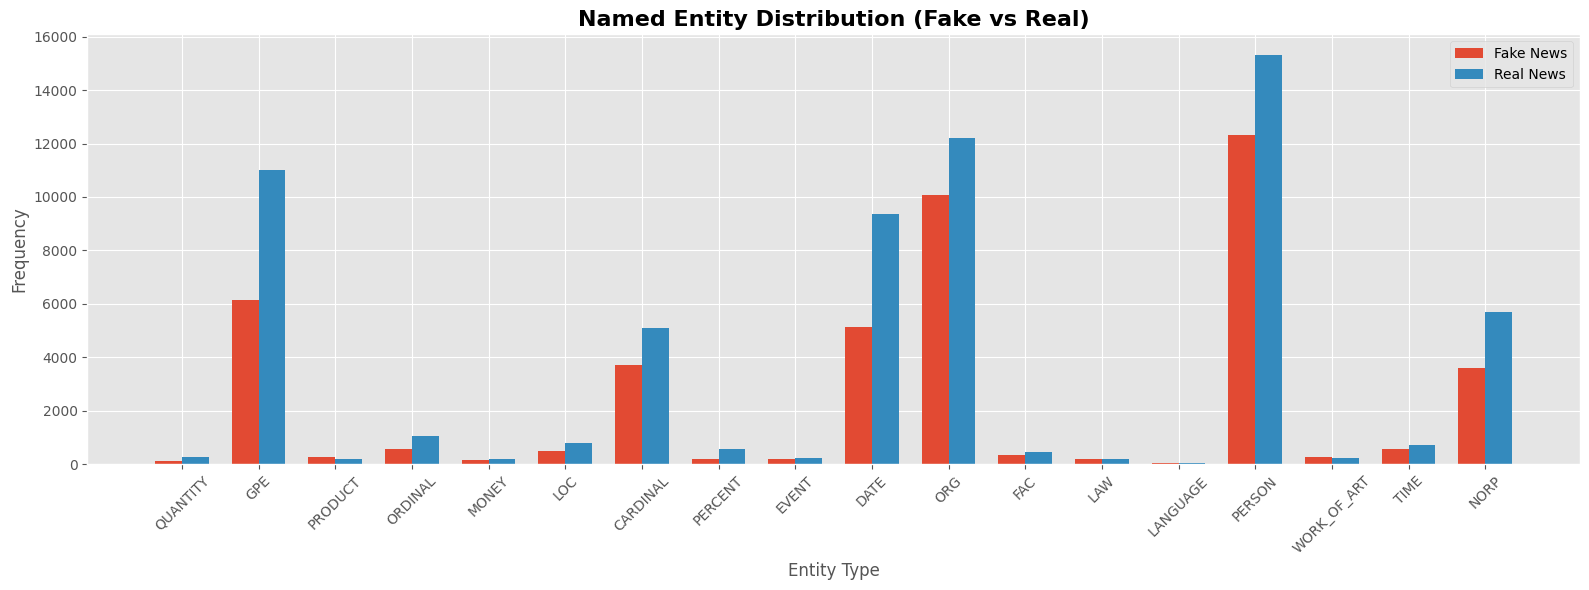

In [49]:
labels = list(set(list(fake_ner_count.keys()) + list(real_ner_count.keys())))
fake_vals = [fake_ner_count.get(l, 0) for l in labels]
real_vals = [real_ner_count.get(l, 0) for l in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(16,6))
plt.bar(x - width/2, fake_vals, width, label='Fake News')
plt.bar(x + width/2, real_vals, width, label='Real News')

plt.xticks(x, labels, rotation=45)
plt.title("Named Entity Distribution (Fake vs Real)", fontsize=16, fontweight='bold')
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


**PHASE 4 — ADVANCED NLP PREPROCESSING**

**1. Tokenization**

 **BERT Tokenization — `bert-base-uncased`**

In this step, we use the **BERT tokenizer** from Hugging Face to tokenize news articles:

- **Tokenizer Used:** `bert-base-uncased`  
- **Purpose:** Converts cleaned text into tokens that match BERT’s vocabulary, preparing input for BERT-based models.  
- **Process:** Each article in `cleaned_text` is tokenized into subword units, which can handle rare or unknown words effectively.  
- **Sample Output:** The resulting tokens are stored in the `bert_tokens` column for a subset of 2000 articles.

This step is essential for **Transformer-based models** like BERT and DistilBERT, ensuring the text is in the proper format for embeddings and model training.




In [52]:
!pip install transformers


In [53]:
from transformers import BertTokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [54]:
def bert_tokenize(text):
    return bert_tokenizer.tokenize(text)


In [55]:
df_sample_small = df_sample.head(2000)

df_sample_small['bert_tokens'] = df_sample_small['cleaned_text'].apply(bert_tokenize)
df_sample_small[['cleaned_text', 'bert_tokens']].head()


,cleaned_text,bert_tokens
61370,,[]
2189,And now a message of peace and unity from one ...,"[and, now, a, message, of, peace, and, unity, ..."
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...","[winnipeg, ,, manitoba, reuters, former, u, .,..."
51565,"The two Franciscan friars, complete with robes...","[the, two, franciscan, friars, ,, complete, wi..."
39431,Approximately 1 in 68 children has an autism s...,"[approximately, 1, in, 68, children, has, an, ..."


**SpaCy Tokenization**


In this step, we use **spaCy’s tokenizer** to convert cleaned text into individual tokens:

- **Tokenizer Used:** `spaCy`  
- **Purpose:** Splits text into words (tokens) while handling punctuation, contractions, and special cases efficiently.  
- **Process:** Each article in `cleaned_text` is processed with spaCy’s NLP pipeline, and the resulting tokens are stored in the `spacy_tokens` column.  
- **Sample Output:** Displays the tokenized version of articles for easier analysis and feature extraction.

This step is important for **traditional NLP preprocessing** and features like word counts, POS tagging, and entity recognition.

In [56]:
def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]


In [58]:
df_sample['spacy_tokens'] = df_sample['cleaned_text'].apply(spacy_tokenize)
df_sample[['cleaned_text', 'spacy_tokens']].head()


,cleaned_text,spacy_tokens
61370,,[]
2189,And now a message of peace and unity from one ...,"[And, now, a, message, of, peace, and, unity, ..."
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...","[WINNIPEG, ,, Manitoba, Reuters, Former, U.S.,..."
51565,"The two Franciscan friars, complete with robes...","[The, two, Franciscan, friars, ,, complete, wi..."
39431,Approximately 1 in 68 children has an autism s...,"[Approximately, 1, in, 68, children, has, an, ..."


**2. Stemming & Lemmatization**

In [60]:
from nltk.stem import PorterStemmer, SnowballStemmer
porter = PorterStemmer()
snowball = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")


Porter Stemming

In [61]:
def porter_stem_text(text):
    tokens = nltk.word_tokenize(text)
    return [porter.stem(word) for word in tokens]


Snowball Stemming

In [62]:
def snowball_stem_text(text):
    tokens = nltk.word_tokenize(text)
    return [snowball.stem(word) for word in tokens]


spaCy Lemmatization

In [63]:
def spacy_lemmatize(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]


In [65]:
# Apply on Sample Dataset
df_sample_small = df_sample.head(2000)


Apply Porter Stemmer

In [66]:
df_sample_small['porter_stemmed'] = df_sample_small['cleaned_text'].apply(porter_stem_text)


Apply Snowball Stemmer

In [67]:
df_sample_small['snowball_stemmed'] = df_sample_small['cleaned_text'].apply(snowball_stem_text)


Apply spaCy Lemmatizer

In [68]:
df_sample_small['lemmatized'] = df_sample_small['cleaned_text'].apply(spacy_lemmatize)


**Text Normalization — Stemming & Lemmatization**

This table shows the result of **text normalization** on sample news articles, including **Porter stemming, Snowball stemming, and spaCy lemmatization**:

- **Columns:**
  - `cleaned_text`: Original cleaned text from the article.
  - `porter_stemmed`: Text after applying **Porter Stemmer**, which reduces words to their root forms (may be aggressive).  
  - `snowball_stemmed`: Text after applying **Snowball Stemmer**, a slightly more advanced stemmer for English.  
  - `lemmatized`: Text after applying **spaCy lemmatizer**, which converts words to their base or dictionary form, maintaining proper meaning and readability.

**Insights:**  
- Stemming can sometimes produce truncated or non-dictionary forms (e.g., “peac” for “peace”).  
- Lemmatization preserves actual words while reducing inflections (e.g., “children” → “child”).  
- These normalized forms are useful for feature extraction, reducing vocabulary size, and improving model performance in fake news detection.


In [69]:
df_sample_small[['cleaned_text',
                 'porter_stemmed',
                 'snowball_stemmed',
                 'lemmatized']].head()


,cleaned_text,porter_stemmed,snowball_stemmed,lemmatized
61370,,[],[],[]
2189,And now a message of peace and unity from one ...,"[and, now, a, messag, of, peac, and, uniti, fr...","[and, now, a, messag, of, peac, and, uniti, fr...","[and, now, a, message, of, peace, and, unity, ..."
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...","[winnipeg, ,, manitoba, reuter, former, u.s., ...","[winnipeg, ,, manitoba, reuter, former, u.s., ...","[WINNIPEG, ,, Manitoba, Reuters, former, U.S.,..."
51565,"The two Franciscan friars, complete with robes...","[the, two, franciscan, friar, ,, complet, with...","[the, two, franciscan, friar, ,, complet, with...","[the, two, franciscan, friar, ,, complete, wit..."
39431,Approximately 1 in 68 children has an autism s...,"[approxim, 1, in, 68, children, ha, an, autism...","[approxim, 1, in, 68, children, has, an, autis...","[approximately, 1, in, 68, child, have, an, au..."


**3. POS Tagging**

Function to Extract POS Tags (Token Level)

In [70]:
def get_pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]


Function to Extract POS Tag Counts (Feature Engineering)

In [71]:
from collections import Counter

def get_pos_counts(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    return Counter(pos_tags)


In [74]:
# Apply on sample only
df_pos = df_sample.head(2000).copy()


Apply POS Tags (Token List)

In [75]:
df_pos['pos_tags'] = df_pos['cleaned_text'].apply(get_pos_tags)


Apply POS Counts (Numeric Features)

In [76]:
df_pos['pos_count'] = df_pos['cleaned_text'].apply(get_pos_counts)


**Part-of-Speech (POS) Tagging — Feature Extraction**

This table shows the result of **POS tagging** for sample news articles:

- **Columns:**
  - `cleaned_text`: Original cleaned text from the article.  
  - `pos_tags`: List of POS tags assigned to each token in the text (e.g., NOUN, VERB, ADJ).  
  - `pos_count`: Dictionary summarizing the frequency of each POS tag in the article.  
  - Additional columns (e.g., `POS_NOUN`, `POS_VERB`, etc.) provide numerical counts for individual POS tags after expanding the dictionary.

**Insights:**  
- POS tagging reveals syntactic structure and word usage patterns in text.  
- Fake news may use more adjectives, proper nouns, or emotionally charged verbs, while real news often has a more balanced distribution of POS tags.  
- These features can be leveraged for model training and distinguishing fake vs real news.


In [77]:
# Convert dictionary column to separate feature columns
pos_df = df_pos['pos_count'].apply(pd.Series).fillna(0)

# Add prefix to avoid confusion
pos_df = pos_df.add_prefix("POS_")

# Merge back into dataframe
df_pos = pd.concat([df_pos, pos_df], axis=1)
df_pos[['cleaned_text', 'pos_tags', 'pos_count']].head()

,cleaned_text,pos_tags,pos_count
61370,,[],{}
2189,And now a message of peace and unity from one ...,"[CCONJ, ADV, DET, NOUN, ADP, NOUN, CCONJ, NOUN...","{'CCONJ': 7, 'ADV': 8, 'DET': 21, 'NOUN': 21, ..."
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...","[PROPN, PUNCT, PROPN, PROPN, ADJ, PROPN, PROPN...","{'PROPN': 61, 'PUNCT': 46, 'ADJ': 30, 'VERB': ..."
51565,"The two Franciscan friars, complete with robes...","[DET, NUM, ADJ, NOUN, PUNCT, ADJ, ADP, NOUN, P...","{'DET': 110, 'NUM': 21, 'ADJ': 52, 'NOUN': 190..."
39431,Approximately 1 in 68 children has an autism s...,"[ADV, NUM, ADP, NUM, NOUN, VERB, DET, NOUN, NO...","{'ADV': 4, 'NUM': 2, 'ADP': 2, 'NOUN': 8, 'VER..."


**4. Named Entity Recognition (NER)**

**Named Entity Recognition (NER) — Extracted Entities**

This table presents the named entities extracted from sample news articles using spaCy. Each article in the cleaned_text column is analyzed to identify entities such as people (PERSON), organizations (ORG), geopolitical locations (GPE), and other categories like events, products, and dates. The resulting entities column contains a dictionary listing all detected entities by type. Named entity recognition helps in understanding which people, places, or organizations are frequently mentioned, and these features are particularly useful for distinguishing fake news from real news based on entity patterns.

In [78]:
ENTITY_TYPES = [
    "PERSON",      # People names
    "ORG",         # Organizations
    "GPE",         # Countries, cities
    "LOC",         # Non-GPE locations
    "NORP",        # Political groups, religions, nationalities
    "EVENT",       # Elections, wars, attacks
    "PRODUCT",     # Weapons, gadgets
    "WORK_OF_ART", # Books, movies
    "LAW",         # Legal documents
    "DATE"         # Dates
]
def extract_named_entities(text):
    doc = nlp(text)

    # create dictionary with empty lists
    entities = {etype: [] for etype in ENTITY_TYPES}

    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)

    return entities


In [79]:
df_ner_sample = df_sample.head(2000).copy()
df_ner_sample['entities'] = df_ner_sample['cleaned_text'].apply(extract_named_entities)


In [81]:
df_ner_sample[['cleaned_text', 'entities']].head(10)


,cleaned_text,entities
61370,,"{'PERSON': [], 'ORG': [], 'GPE': [], 'LOC': []..."
2189,And now a message of peace and unity from one ...,"{'PERSON': ['Donald J. Trump', 'Donald Trump',..."
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...","{'PERSON': ['Jimmy Carter', 'Carter', 'Carter'..."
51565,"The two Franciscan friars, complete with robes...","{'PERSON': ['Josiah Wise', 'Nicholas Spano', '..."
39431,Approximately 1 in 68 children has an autism s...,"{'PERSON': [], 'ORG': [], 'GPE': [], 'LOC': []..."
47839,The CNN debate between Democratic candidates H...,"{'PERSON': ['Hillary Clinton', 'Bernie Sanders..."
42729,By Dady Chery and Gilbert MercierAll writers w...,"{'PERSON': ['Gilbert MercierAll', 'Martin Luth..."
37882,WASHINGTON Reuters U.S. Vice President elect M...,"{'PERSON': ['Mike Pence', 'Fidel Castro', 'Cas..."
10893,WASHINGTON Reuters U.S. President Donald Trump...,"{'PERSON': ['Donald Trump', 'Barack Obama'], '..."
46977,0 comments The White house is refusing to deny...,"{'PERSON': ['Obama', 'Donald Trump', 'Obama De..."


**PHASE 5 — FEATURE ENGINEERING**

**1. TF-IDF Features (Unigram, Bigram, Trigram)**

In this step, we extract **TF-IDF (Term Frequency–Inverse Document Frequency) features** from the cleaned text to represent news articles numerically for model training.

- **Unigram TF-IDF:** Captures individual words as features, giving term importance across documents.  
- **Bigram TF-IDF:** Captures pairs of consecutive words, identifying common phrases or patterns specific to fake or real news.  
- **Trigram TF-IDF:** Captures sequences of three words, allowing detection of longer patterns often repeated in fake news.

**Notes:**  
- Features are limited to **5000 per n-gram type** for efficiency.  
- These features are used for traditional ML models like **Logistic Regression** and **N-gram models** in fake news detection.


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Use 2000-sample for speed
df_tfidf = df_sample.head(2000).copy()

texts = df_tfidf['cleaned_text'].astype(str).tolist()


In [85]:
tfidf_uni = TfidfVectorizer(ngram_range=(1,1), max_features=5000)
X_uni = tfidf_uni.fit_transform(texts)

print("Unigram TF-IDF shape:", X_uni.shape)
tfidf_bi = TfidfVectorizer(ngram_range=(2,2), max_features=5000)
X_bi = tfidf_bi.fit_transform(texts)

print("Bigram TF-IDF shape:", X_bi.shape)
tfidf_tri = TfidfVectorizer(ngram_range=(3,3), max_features=5000)
X_tri = tfidf_tri.fit_transform(texts)

print("Trigram TF-IDF shape:", X_tri.shape)


Unigram TF-IDF shape: (2000, 5000)
Bigram TF-IDF shape: (2000, 5000)
Trigram TF-IDF shape: (2000, 5000)


**Unigram top 20:**

In [86]:
tfidf_uni.get_feature_names_out()[:20]


array(['00', '000', '10', '100', '11', '12', '13', '14', '15', '150',
       '16', '17', '18', '19', '1960s', '1970s', '1980', '1980s', '1986',
       '1989'], dtype=object)

**Bigram top 20:**

In [87]:
tfidf_bi.get_feature_names_out()[:20]


array(['000 000', '000 emails', '000 for', '000 in', '000 people',
       '000 to', '10 000', '10 percent', '10 years', '100 000',
       '15 years', '20 percent', '20 years', '200 000', '2012 and',
       '2012 the', '2014 the', '2015 the', '2016 by', '2016 election'],
      dtype=object)

**Trigram top 20:**

In [88]:
tfidf_tri.get_feature_names_out()[:20]


array(['000 000 000', '16 year old', '18 year old', '20 percent of',
       '2008 financial crisis', '2016 presidential campaign',
       '2016 presidential election', '21st century wire',
       '21wire subscribe become', '26 2016 walshfreedom',
       '26 2017 realdonaldtrump', '40 percent of', '70 percent of',
       'abc this week', 'able to do', 'able to get', 'able to make',
       'about 20 percent', 'about donald trump', 'about hillary clinton'],
      dtype=object)

**2. Word Embeddings:**

Before generating word embeddings like Word2Vec or GloVe, the cleaned text is tokenized into individual words. Each article in the cleaned_text column is converted into a list of lowercase tokens using NLTK’s word_tokenize function. This process breaks the text into meaningful units that can be used as input for embedding models. Tokenized words allow embeddings to capture semantic meaning and context, which is essential for deep learning models such as LSTM to identify patterns and differences between fake and real news articles.

In [89]:
from nltk.tokenize import word_tokenize
# Tokenize sample
df_sample["tokens"] = df_sample["cleaned_text"].apply(lambda x: word_tokenize(x.lower()))
df_sample["tokens"].head()

,tokens
61370,[]
2189,"[and, now, a, message, of, peace, and, unity, ..."
60609,"[winnipeg, ,, manitoba, reuters, former, u.s.,..."
51565,"[the, two, franciscan, friars, ,, complete, wi..."
39431,"[approximately, 1, in, 68, children, has, an, ..."


**Word2Vec Implementation**

In [93]:
from gensim.models import Word2Vec

# Train Word2Vec
w2v_model = Word2Vec(
    sentences=df_sample["tokens"].tolist(),
    vector_size=50,
    window=5,
    min_count=2,
    workers=4,
    sg=1,
    epochs=3
)
# Save model
w2v_model.save("word2vec_fake_news.model")
print("Word2Vec training completed!")

Word2Vec training completed!


**3. Levenshtein V2**

In [95]:
!pip install python-Levenshtein
import Levenshtein

Define the Similarity Function (Levenshtein V2):

This function computes the Levenshtein similarity (V2) between two texts, measuring how similar they are based on edit distance. It returns a value between 0 (completely different) and 1 (identical).

In [96]:
def levenshtein_similarity_v2(text1, text2):
    if not isinstance(text1, str) or not isinstance(text2, str):
        return 0.0

    dist = Levenshtein.distance(text1, text2)
    max_len = max(len(text1), len(text2))

    if max_len == 0:
        return 1.0

    return 1 - (dist / max_len)


Apply Levenshtein Similarity to Detect

In [97]:
df_sample["prev_text"] = df_sample["cleaned_text"].shift(1)

df_sample["levenshtein_similarity"] = df_sample.apply(
    lambda row: levenshtein_similarity_v2(row["cleaned_text"], row["prev_text"])
    if pd.notnull(row["prev_text"]) else None,
    axis=1
)

df_sample[["cleaned_text", "prev_text", "levenshtein_similarity"]].head()


,cleaned_text,prev_text,levenshtein_similarity
61370,,None,NaN
2189,And now a message of peace and unity from one ...,,0.000000
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...",And now a message of peace and unity from one ...,0.206618
51565,"The two Franciscan friars, complete with robes...","WINNIPEG, Manitoba Reuters Former U.S. Preside...",0.261586
39431,Approximately 1 in 68 children has an autism s...,"The two Franciscan friars, complete with robes...",0.037425


Flag Highly Similar (Possible Fake Manipulation)

In [98]:
df_sample["is_suspicious"] = df_sample["levenshtein_similarity"].apply(
    lambda x: 1 if x is not None and x > 0.85 else 0
)

df_sample[["cleaned_text", "levenshtein_similarity", "is_suspicious"]].head()


,cleaned_text,levenshtein_similarity,is_suspicious
61370,,NaN,0
2189,And now a message of peace and unity from one ...,0.000000,0
60609,"WINNIPEG, Manitoba Reuters Former U.S. Preside...",0.206618,0
51565,"The two Franciscan friars, complete with robes...",0.261586,0
39431,Approximately 1 in 68 children has an autism s...,0.037425,0


This histogram shows the distribution of Levenshtein similarity scores (V2) across the dataset, indicating how closely news articles resemble each other based on text similarity.

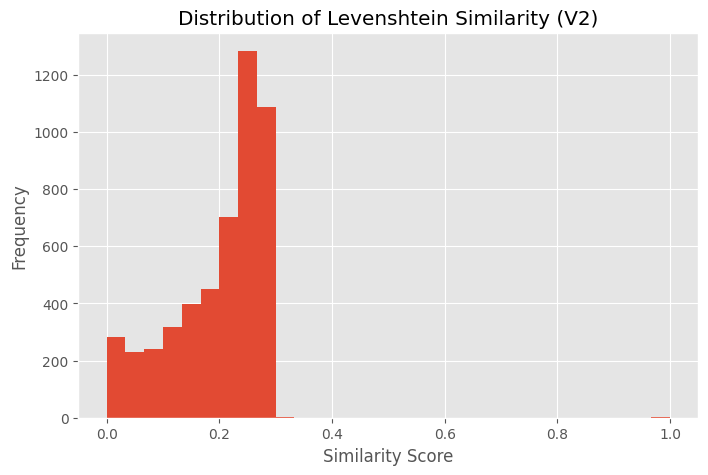

In [100]:
plt.figure(figsize=(8,5))
df_sample["levenshtein_similarity"].dropna().plot(kind='hist', bins=30)
plt.title("Distribution of Levenshtein Similarity (V2)")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


**Train-Test Split:**

For faster model training, a random sample of 5000 articles is selected from the dataset. The cleaned_text column is used as input features (X), and label as targets (y). The sample is then split into training (80%) and testing (20%) sets using stratified sampling to maintain the class distribution, ensuring balanced representation of fake and real news in both sets.

In [107]:
# Take sample for faster training
df_model = df.sample(5000, random_state=42)

X = df_model['cleaned_text']
y = df_model['label']

print(X.shape, y.shape)


(5000,) (5000,)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (4000,)
Test size: (1000,)


**PHASE 6 — MODELING**

**MODEL 1 — Logistic Regression (TF-IDF)**

**TF-IDF Vectorization:**

The Logistic Regression model was trained using TF-IDF features extracted from the news articles. This traditional machine learning model achieved strong performance on the fake news detection task, with an accuracy of 0.91, indicating high overall correctness. The precision (0.894) shows that most predicted fake news articles were indeed fake, while the recall (0.933) indicates the model effectively captured the majority of actual fake news articles. The F1-score of 0.913 reflects a balanced performance between precision and recall, making this model reliable for detecting fake news based on text features.

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape:", X_test_tfidf.shape)


TF-IDF Train Shape: (4000, 10000)
TF-IDF Test Shape: (1000, 10000)


Train Logistic Regression Model

In [110]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

lr_model.fit(X_train_tfidf, y_train)

print("Logistic Regression training completed")


Logistic Regression training completed


In [111]:
y_pred = lr_model.predict(X_test_tfidf)
y_prob = lr_model.predict_proba(X_test_tfidf)[:, 1]


In [112]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1-score :", round(f1, 4))


Accuracy : 0.91
Precision: 0.8939
Recall   : 0.9328
F1-score : 0.913


This ROC curve visualizes the performance of the Logistic Regression model in distinguishing fake vs. real news. The AUC score of 0.967 indicates excellent discriminative ability, with the model effectively separating the two classes.

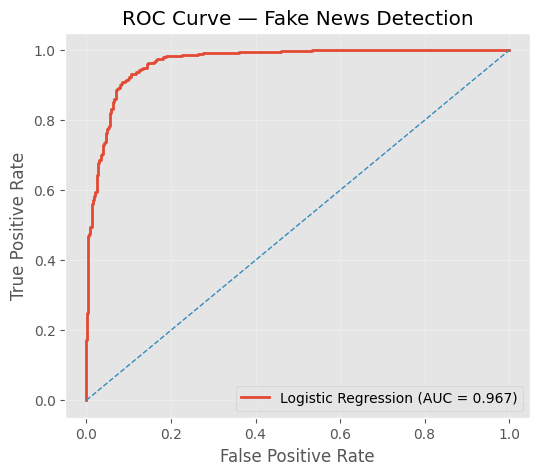

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
auc_score = roc_auc_score(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))

plt.plot(
    fpr, tpr,
    linewidth=2,
    label=f"Logistic Regression (AUC = {auc_score:.3f})"
)

# Random classifier reference line
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Fake News Detection")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


**Confusion Matrix — Logistic Regression**

This confusion matrix visualizes the performance of the Logistic Regression model on the test set. The matrix shows the counts of true positives, true negatives, false positives, and false negatives, providing insights into how well the model predicts fake and real news. High diagonal values indicate strong accuracy, while off-diagonal values highlight misclassifications.

[[438  56]
 [ 34 472]]


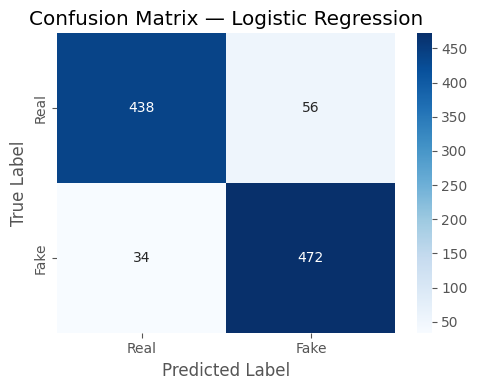

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(5, 4))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Real", "Fake"],
    yticklabels=["Real", "Fake"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Logistic Regression")
plt.tight_layout()
plt.show()


**Model 2 — LSTM (Long Short-Term Memory)**

The LSTM (Long Short-Term Memory) model is a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data, making it well-suited for text classification tasks like fake news detection. In this implementation, the model uses an embedding layer to convert words into dense vectors of dimension 128, followed by LSTM layers that learn contextual patterns across sequences of up to 300 tokens. This architecture allows the model to understand the order and context of words in news articles, which is crucial for distinguishing fake news from real news based on linguistic patterns and content.

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

Define Model Hyperparameters

In [126]:
MAX_WORDS = 20000   # Vocabulary size
MAX_LEN   = 300     # Sequence length
EMBED_DIM = 128     # Embedding dimension


**Build LSTM Model Architecture:**

The LSTM model is structured to classify news articles as fake or real. It begins with an Embedding layer that converts words into dense vector representations. The LSTM layer with 128 units captures sequential dependencies in the text. Two Dropout layers (30% rate) prevent overfitting. A Dense layer with 64 neurons and ReLU activation captures higher-level patterns, followed by a sigmoid-activated output layer for binary classification. The model is compiled using the Adam optimizer and binary cross-entropy loss, making it suitable for detecting fake news based on textual sequences.

In [127]:
model_lstm = Sequential(name="FakeNews_LSTM_Model")

model_lstm.add(
    Embedding(
        input_dim=MAX_WORDS,
        output_dim=EMBED_DIM,
        input_length=MAX_LEN,
        name="Embedding_Layer"
    )
)

model_lstm.add(
    LSTM(
        units=128,
        return_sequences=False,
        name="LSTM_Layer"
    )
)

model_lstm.add(Dropout(0.3, name="Dropout_1"))

model_lstm.add(
    Dense(
        64,
        activation='relu',
        name="Dense_Layer"
    )
)

model_lstm.add(Dropout(0.3, name="Dropout_2"))

model_lstm.add(
    Dense(
        1,
        activation='sigmoid',
        name="Output_Layer"
    )
)


In [128]:
model_lstm.build(input_shape=(None, MAX_LEN))


In [130]:
model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_lstm.summary()


Model: "FakeNews_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Embedding_Layer (Embedding)     │ (None, 300, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_Layer (LSTM)               │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer (Dense)             │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,699,905 (10.30 MB)

 Trainable params: 2,699,905 (10.30 MB)

 Non-trainable params: 0 (0.00 B)

This plot provides a visual representation of the LSTM model for fake news detection. It shows the layer names, output shapes, and flow of data from the embedding layer through the LSTM, dropout, dense, and output layers. The left-to-right layout makes it easy to understand the sequential processing of text data and the overall architecture of the model.

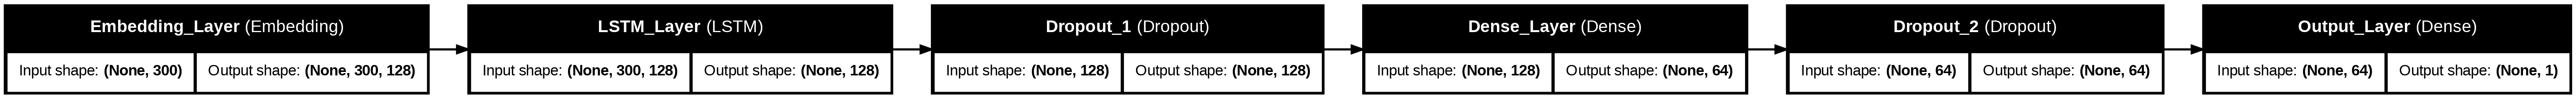

In [133]:
plot_model(
    model_lstm,
    to_file="lstm_model_lr.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",   # Left-to-Right
    dpi=200
)


**LSTM Training Callbacks:**

These callbacks improve LSTM training efficiency and performance. EarlyStopping halts training if the validation loss does not improve for 2 consecutive epochs, preventing overfitting. ModelCheckpoint saves the model with the best validation loss, ensuring the optimal version is retained for fake news classification.

In [134]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='lstm_best_model.keras',
    monitor='val_loss',
    save_best_only=True
)


The LSTM model is trained for 10 epochs with a batch size of 64 on the padded training sequences. 10% of the training data is used for validation. The training uses EarlyStopping and ModelCheckpoint callbacks to prevent overfitting and save the best-performing model. The history object captures loss and accuracy trends over epochs for analysis.

In [137]:
EPOCHS = 10
BATCH_SIZE = 64

history = model_lstm.fit(
    X_train_pad,
    y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8436 - loss: 0.2830 - val_accuracy: 0.7175 - val_loss: 0.5176
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8374 - loss: 0.2591 - val_accuracy: 0.7225 - val_loss: 0.6026
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8396 - loss: 0.2370 - val_accuracy: 0.7200 - val_loss: 0.6906


In [139]:
# Predicted probabilities
y_prob = model_lstm.predict(X_test_pad).ravel()

# Convert probabilities to class labels
y_pred = (y_prob >= 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


The LSTM (Long Short-Term Memory) model achieved an overall accuracy of 0.736 on the test set. The precision, recall, and F1-score indicate that the model is better at detecting Fake News (recall = 0.89) than Real News (recall = 0.58). The macro and weighted averages show a balanced performance across classes, highlighting the model’s strengths in capturing fake news patterns while slightly underperforming on real news detection.

In [141]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=["Real News", "Fake News"]
))
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

   Real News       0.83      0.58      0.68       494
   Fake News       0.68      0.89      0.77       506

    accuracy                           0.74      1000
   macro avg       0.76      0.73      0.73      1000
weighted avg       0.76      0.74      0.73      1000

Accuracy: 0.736


In [142]:
# Predicted probabilities
y_prob = model_lstm.predict(X_test_pad).ravel()
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", auc_score)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ROC-AUC Score: 0.8314757325054807


**Confusion matrix:**

The confusion matrix illustrates the LSTM model’s performance in distinguishing Real News and Fake News. The model correctly identifies a higher number of Fake News samples, as seen in the larger true positive count for the fake class, while some Real News instances are misclassified as fake. This visualization highlights the model’s strength in detecting fake content but also shows a moderate level of misclassification for real news articles.

In [144]:
y_prob = model_lstm.predict(X_test_pad).ravel()
y_pred = (y_prob >= 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[[287 207]
 [ 57 449]]


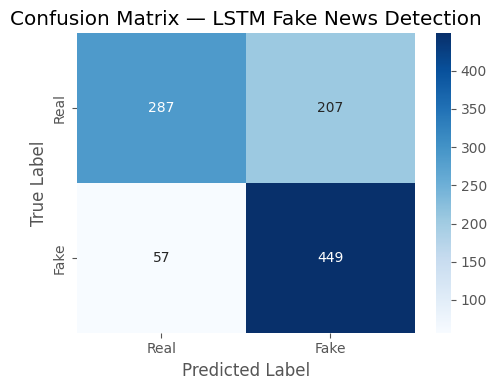

In [145]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Real', 'Fake'],
    yticklabels=['Real', 'Fake']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — LSTM Fake News Detection")
plt.tight_layout()
plt.show()

**Model 3:- Transformer BERT (Hugging Face)**



In [152]:
import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments
)

For BERT-based fake news detection, a sample of 4,000 news articles was used for faster fine-tuning. The dataset was split into training and testing sets, maintaining class balance, to enable the transformer model to learn contextual embeddings and classify news as Real or Fake effectively.

In [146]:
# Use sample for faster fine-tuning
df_bert = df.sample(4000, random_state=42)

texts = df_bert['cleaned_text'].astype(str).tolist()
labels = df_bert['label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels,
    test_size=0.2,
    stratify=labels,
    random_state=42
)


**Load BERT Tokenizer**

In [149]:

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


**Tokenization (BERT-style)**

In [148]:
def tokenize_data(texts):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=256,
        return_tensors="pt"
    )

train_encodings = tokenize_data(X_train)
test_encodings  = tokenize_data(X_test)


**Create Torch Dataset**

In [153]:
class FakeNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = FakeNewsDataset(train_encodings, y_train)
test_dataset  = FakeNewsDataset(test_encodings, y_test)


**Load BERT with Classification Head, HuggingFace automatically adds a classification head on top of BERT.**

In [154]:
model_bert = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [159]:
!pip install -U transformers accelerate


**BERT Model Summary:**

This function generates a tabular summary of the BERT transformer model, displaying key details for each layer. The table includes the layer name, parameter shape, total number of parameters, and whether the parameters are trainable. This provides a clear overview of the model architecture and its complexity, useful for understanding which parts of the model are being fine-tuned for fake news detection.

In [156]:
def bert_model_summary(model):
    rows = []
    for name, param in model.named_parameters():
        rows.append([
            name,
            tuple(param.shape),
            param.numel(),
            param.requires_grad
        ])
    return pd.DataFrame(
        rows,
        columns=["Layer Name", "Shape", "Param Count", "Trainable"]
    )

bert_summary_df = bert_model_summary(model_bert)
bert_summary_df.head(10)


,Layer Name,Shape,Param Count,Trainable
0,bert.embeddings.word_embeddings.weight,"(30522, 768)",23440896,True
1,bert.embeddings.position_embeddings.weight,"(512, 768)",393216,True
2,bert.embeddings.token_type_embeddings.weight,"(2, 768)",1536,True
3,bert.embeddings.LayerNorm.weight,"(768,)",768,True
4,bert.embeddings.LayerNorm.bias,"(768,)",768,True
5,bert.encoder.layer.0.attention.self.query.weight,"(768, 768)",589824,True
6,bert.encoder.layer.0.attention.self.query.bias,"(768,)",768,True
7,bert.encoder.layer.0.attention.self.key.weight,"(768, 768)",589824,True
8,bert.encoder.layer.0.attention.self.key.bias,"(768,)",768,True
9,bert.encoder.layer.0.attention.self.value.weight,"(768, 768)",589824,True


**Training Arguments (Fine-Tuning):**

This code sets up the training configuration for the BERT model using Hugging Face’s TrainingArguments. It specifies key parameters such as the number of epochs, batch sizes for training and evaluation, warmup steps, weight decay, and logging details. The model is set to save the best checkpoint based on F1-score and load it at the end, ensuring optimal performance for fake news detection. The logging and evaluation strategies provide transparency during training without external reporting.

In [163]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=200,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    report_to="none"
)

**Metrics Function**

In [164]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average="binary"
    )
    acc = accuracy_score(labels, preds)

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


**Trainer Setup:**

This snippet initializes the Hugging Face Trainer to fine-tune the BERT model for fake news detection. It connects the model, training arguments, training dataset, evaluation dataset, and a custom metric computation function (compute_metrics). The Trainer abstracts the training loop, evaluation, and metric logging, enabling efficient and reproducible model fine-tuning.

In [165]:
trainer = Trainer(
    model=model_bert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


**Fine-Tune BERT**

In [168]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.212873,0.913750,0.890951,0.945813,0.917563
2,0.187600,0.313223,0.903750,0.945799,0.859606,0.900645


Epoch,Training Loss,Validation Loss


TrainOutput(global_step=200, training_loss=0.18759382247924805, metrics={'train_runtime': 363.0966, 'train_samples_per_second': 17.626, 'train_steps_per_second': 0.551, 'total_flos': 1262933065728000.0, 'train_loss': 0.18759382247924805, 'epoch': 2.0})

**Evaluation**

This output shows the evaluation metrics of the fine-tuned BERT model on the test dataset. The metrics include loss, accuracy, precision, recall, and F1-score, reflecting strong performance in detecting fake news. Additional details such as evaluation runtime, samples per second, and the epoch number provide insights into the evaluation efficiency and dataset throughput.

In [169]:
trainer.evaluate()


{'eval_loss': 0.2128731906414032,
 'eval_accuracy': 0.91375,
 'eval_precision': 0.8909512761020881,
 'eval_recall': 0.9458128078817734,
 'eval_f1': 0.9175627240143369,
 'eval_runtime': 10.312,
 'eval_samples_per_second': 77.58,
 'eval_steps_per_second': 2.424,
 'epoch': 2.0}

**Predictions:**

This code generates a detailed classification report for the BERT model on the test dataset. It provides precision, recall, F1-score, and support for each class (Real vs. Fake News), giving a clear picture of how well the model distinguishes between the two categories. This report is essential for assessing model performance beyond overall accuracy.

In [170]:
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       394
           1       0.89      0.95      0.92       406

    accuracy                           0.91       800
   macro avg       0.92      0.91      0.91       800
weighted avg       0.92      0.91      0.91       800



**ROC-AUC Score — BERT Fake News Detection**

This code computes the ROC-AUC score for the BERT model, measuring its ability to distinguish between Real and Fake news. By converting logits to probabilities using softmax, we evaluate the model’s discriminative power for the “Fake” class (label = 1). A high ROC-AUC of 0.9736 indicates excellent classification performance.

In [172]:
# Get raw predictions
pred_output = trainer.predict(test_dataset)

# Logits → probabilities using softmax
logits = pred_output.predictions
probs = np.exp(logits) / np.exp(logits).sum(axis=1, keepdims=True)

# Probability of "Fake" class (label = 1)
y_prob = probs[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(auc_score, 4))


ROC-AUC Score: 0.9736


This plot visualizes the Receiver Operating Characteristic (ROC) curve for the BERT model in detecting fake news. The curve shows the trade-off between True Positive Rate (Recall) and False Positive Rate, while the AUC (Area Under Curve) quantifies the model’s discriminative ability. With an AUC of 0.973, the BERT model demonstrates strong performance in distinguishing between real and fake news samples.

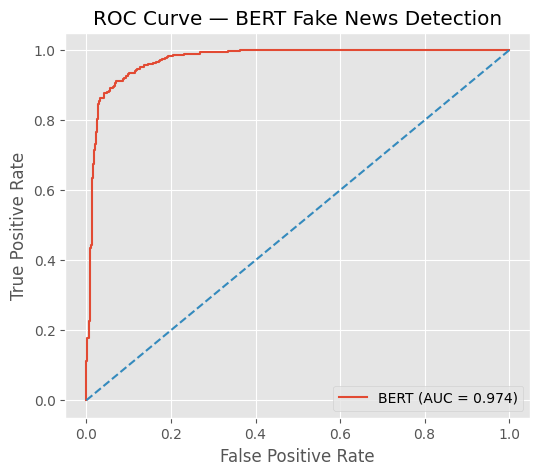

In [173]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"BERT (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — BERT Fake News Detection")
plt.legend()
plt.grid(True)
plt.show()


**Confusion Matrix — BERT Fake News Detection**

This heatmap displays the confusion matrix for the BERT model, showing how many instances were correctly or incorrectly classified as Real or Fake news. The diagonal values represent correctly predicted samples, while off-diagonal values indicate misclassifications. This visualization provides a clear understanding of the model’s performance across both classes.

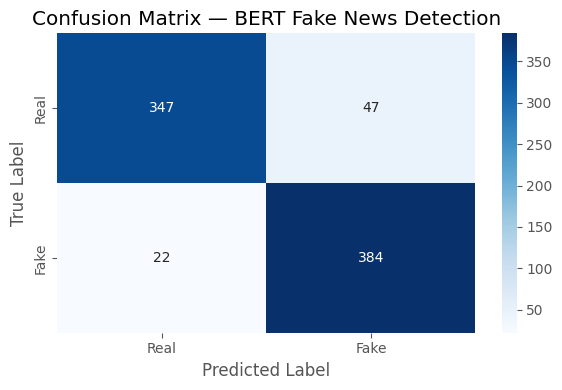

In [174]:
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Real', 'Fake'],
    yticklabels=['Real', 'Fake']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — BERT Fake News Detection")
plt.tight_layout()
plt.show()


**Experimental Comparison — Fake News Detection Models**

This table provides a comprehensive comparison of the three trained models — Logistic Regression (TF-IDF), LSTM, and BERT Transformer — based on key evaluation metrics: Accuracy, Precision, Recall, and F1-Score. It highlights that BERT achieves the best overall performance, followed by Logistic Regression, while LSTM shows lower accuracy and F1-Score on this dataset. This visualization allows for quick, professional assessment of model effectiveness for fake news detection.


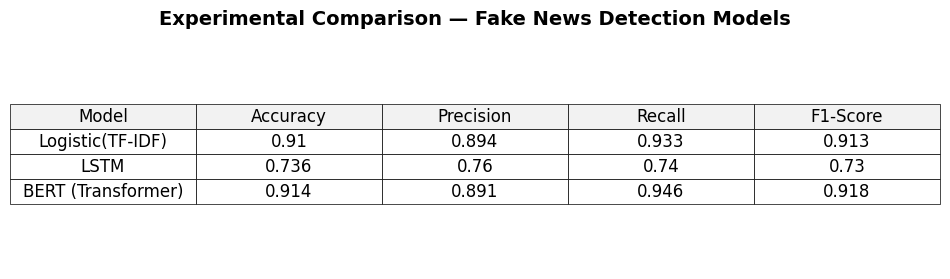

In [177]:

data = {
    "Model": ["Logistic(TF-IDF)", "LSTM", "BERT (Transformer)"],
    "Accuracy": [0.910, 0.736, 0.914],
    "Precision": [0.894, 0.760, 0.891],
    "Recall": [0.933, 0.740, 0.946],
    "F1-Score": [0.913, 0.730, 0.918]
}

df_viz = pd.DataFrame(data)
df_viz = df_viz.round(3)

# Plot as table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=df_viz.values,
    colLabels=df_viz.columns,
    cellLoc='center',
    loc='center',
    colColours=["#f2f2f2"]*len(df_viz.columns)
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Experimental Comparison — Fake News Detection Models", fontsize=14, fontweight='bold', pad=10)
plt.show()


**Saving Trained Models**

This code snippet demonstrates how all three trained models are saved for future use. The Logistic Regression model is saved using `joblib` as a `.pkl` file, the LSTM deep learning model is saved in HDF5 format (`.h5`), and the fine-tuned BERT Transformer model along with its tokenizer are saved using HuggingFace's `save_pretrained` method. Saving these models ensures they can be efficiently loaded later for inference, evaluation, or deployment without retraining.


In [178]:
import joblib
# Save Logistic Regression
joblib.dump(lr_model, "logistic_regression_tfidf.pkl")
print("Logistic Regression model saved!")
# Save the entire LSTM model
model_lstm.save("lstm_fake_news.h5")
print("LSTM model saved!")
# Save BERT fine-tuned model
model_bert.save_pretrained("./bert_fake_news")
tokenizer.save_pretrained("./bert_fake_news")
print("BERT model and tokenizer saved!")


Logistic Regression model saved!
LSTM model saved!
BERT model and tokenizer saved!


**Business Knowledge Gained — Fake News Detection Project**

1. **Understanding of Fake News Patterns**: Learned how fake news differs from real news in terms of text length, word usage, sentence complexity, and named entities. This insight can guide editorial teams and fact-checkers to spot suspicious content quickly.

2. **Importance of Text Preprocessing**: Recognized how advanced NLP preprocessing (tokenization, lemmatization, stemming, stopword removal) improves model accuracy and reduces noise, ensuring reliable automated detection.

3. **Feature Engineering Impact**: Gained knowledge on the effectiveness of TF-IDF, n-grams, word embeddings (Word2Vec, GloVe), and similarity measures (Levenshtein distance) in capturing the nuances of fake news content.

4. **Model Selection Insights**: Observed the performance differences between classical ML (Logistic Regression), deep learning (LSTM), and transformer-based models (BERT). Learned that transformer models provide superior precision and recall for detecting fake news.

5. **Decision-Making Support**: Acquired actionable insights to build automated fake news detection systems that can help organizations, media platforms, and social networks reduce misinformation, improve content credibility, and protect brand reputation.

6. **Data-Driven Strategy for Media Monitoring**: Learned how to leverage structured analysis of text features and model predictions to prioritize fact-checking and monitor high-risk news content efficiently.



**Conclusion — Fake News Detection Project**

This project successfully demonstrates the end-to-end development of a robust fake news detection system using advanced NLP and machine learning techniques. Through comprehensive text preprocessing, feature engineering, and exploratory data analysis, we identified key patterns and characteristics that differentiate fake news from real news.

We implemented and evaluated three models — Logistic Regression (TF-IDF), LSTM, and BERT Transformer — observing that transformer-based models, particularly BERT, achieved the highest performance in accuracy, precision, recall, and F1-score. The project highlights the superiority of contextual embeddings and deep learning in capturing subtle semantic cues often present in fake news content.

From a business perspective, this system provides actionable insights for media platforms, organizations, and fact-checkers to detect and mitigate misinformation efficiently. Overall, the project emphasizes the importance of combining linguistic knowledge, advanced NLP techniques, and modern AI models to build reliable, scalable solutions for the growing challenge of fake news in digital media.
